<a href="https://colab.research.google.com/github/stedua22/6372-Project-2/blob/main/ML1_Project_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Clustering, Association Rules or Recommenders - An AIDS Dataset
`Authors:` Aaron Abromowitz | Catherine Ticzon | Stephanie Duarte | David Camacho  
`Date of Submission:`  
`Description of work:`  
* Aaron: Business Understanding, Train for Infected = Yes, Gaussian Mixture Model (in Exceptional Work)


## Business Understanding

### Prompt A: Describe the purpose of the data set you selected
Why was this data collected in the first place? How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

The dataset originated from a Hammer et. al study that was first published in 1996*, and contains the healthcare statistics and information about patients who were diagnosed with HIV. Originally, this dataset was created to examine the performance of four different types of daily regimens (i.e., treatments) for HIV:
  * 600 mg of zidovudine (ZDV),
  * 600 mg of zidovudine (ZDV) plus 400 mg of didanosine (ddl),
  * 600 mg of zidovudine (ZDV) plus 2.25 mg of zalcitabine (Zal),
  * 400 mg of didanosine (ddl)
   
The three outcomes of interest for the 1996 study were:
1. 50% or greater decline in the CD4 cell count,
1. Development of the acquired immunodeficiency syndrome (AIDS),
1. Death

For the purposes of this project, the main outcome of interest will be whether the patient developed AIDS. This is measured and defined by the value in the `infected` column of the data set where `1 = Yes (has AIDS)` and `0 = No (does not have AIDS)`. The original study collected data on 2,467 patients with HIV. The dataset used for this project has a total of 50,000 observations, which are synthetic records.

In measuring the effectiveness of the prediction algorithm, we aim to produce a model that predicts approximately 50% of the patients being infected with AIDS and 50% of the patients not being infected with AIDS. This metric is based on the finding of the Hammer et al (1996) study, where results found that a total of 50% patients developed AIDS across all treatment groups.

For examining Association Rules, we will try to find Rules where more than 50% of the patients where  `infected = Yes (has AIDS)`.  This will allow us to see if there are any combinations of characteristics where AIDS is particularly common.



---

*Citation: Hammer, S M et al. “A trial comparing nucleoside monotherapy with combination therapy in HIV-infected adults with CD4 cell counts from 200 to 500 per cubic millimeter. AIDS Clinical Trials Group Study 175 Study Team.” The New England journal of medicine vol. 335,15 (1996): 1081-90. doi:10.1056/NEJM199610103351501

## Data Understanding

### Data Prepration

In [ ]:
# Pull in data
import pandas as pd
url = "https://raw.githubusercontent.com/aabromowitz/ML1_Project/main/AIDS_Classification_50000.csv"
df = pd.read_csv(url)

Make sure all the proper columns are considered categorical

In [ ]:
# Make 0 / 1 (i.e. True / False) columns categorical
df['hemo'] = pd.Categorical(df['hemo'])
df['homo'] = pd.Categorical(df['homo'])
df['drugs'] = pd.Categorical(df['drugs'])
df['oprior'] = pd.Categorical(df['oprior'])
df['z30'] = pd.Categorical(df['z30'])
df['offtrt'] = pd.Categorical(df['offtrt'])
df['infected'] = pd.Categorical(df['infected'])
df['trt'] = pd.Categorical(df['trt'])
df['race'] = pd.Categorical(df['race'])
df['gender'] = pd.Categorical(df['gender'])
df['str2'] = pd.Categorical(df['str2'])
df['strat'] = pd.Categorical(df['strat'])
df['symptom'] = pd.Categorical(df['symptom'])
df['treat'] = pd.Categorical(df['treat'])

### Prompt B: Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
Verify data quality: Are there missing values? Duplicate data?
Outliers? Are those mistakes? How do you deal with these problems?

### Prompt C: Visualize the any important attributes appropriately.
Important: Provide an interpretation for any charts or graphs

Since we will be looking at itemsets that have large counts for `infected = Yes (has AIDS)`, it would be useful to see the proportions of infected values for each of the other categorical variables.

Text(0.5, 1.0, 'Infected Proportions by treat')

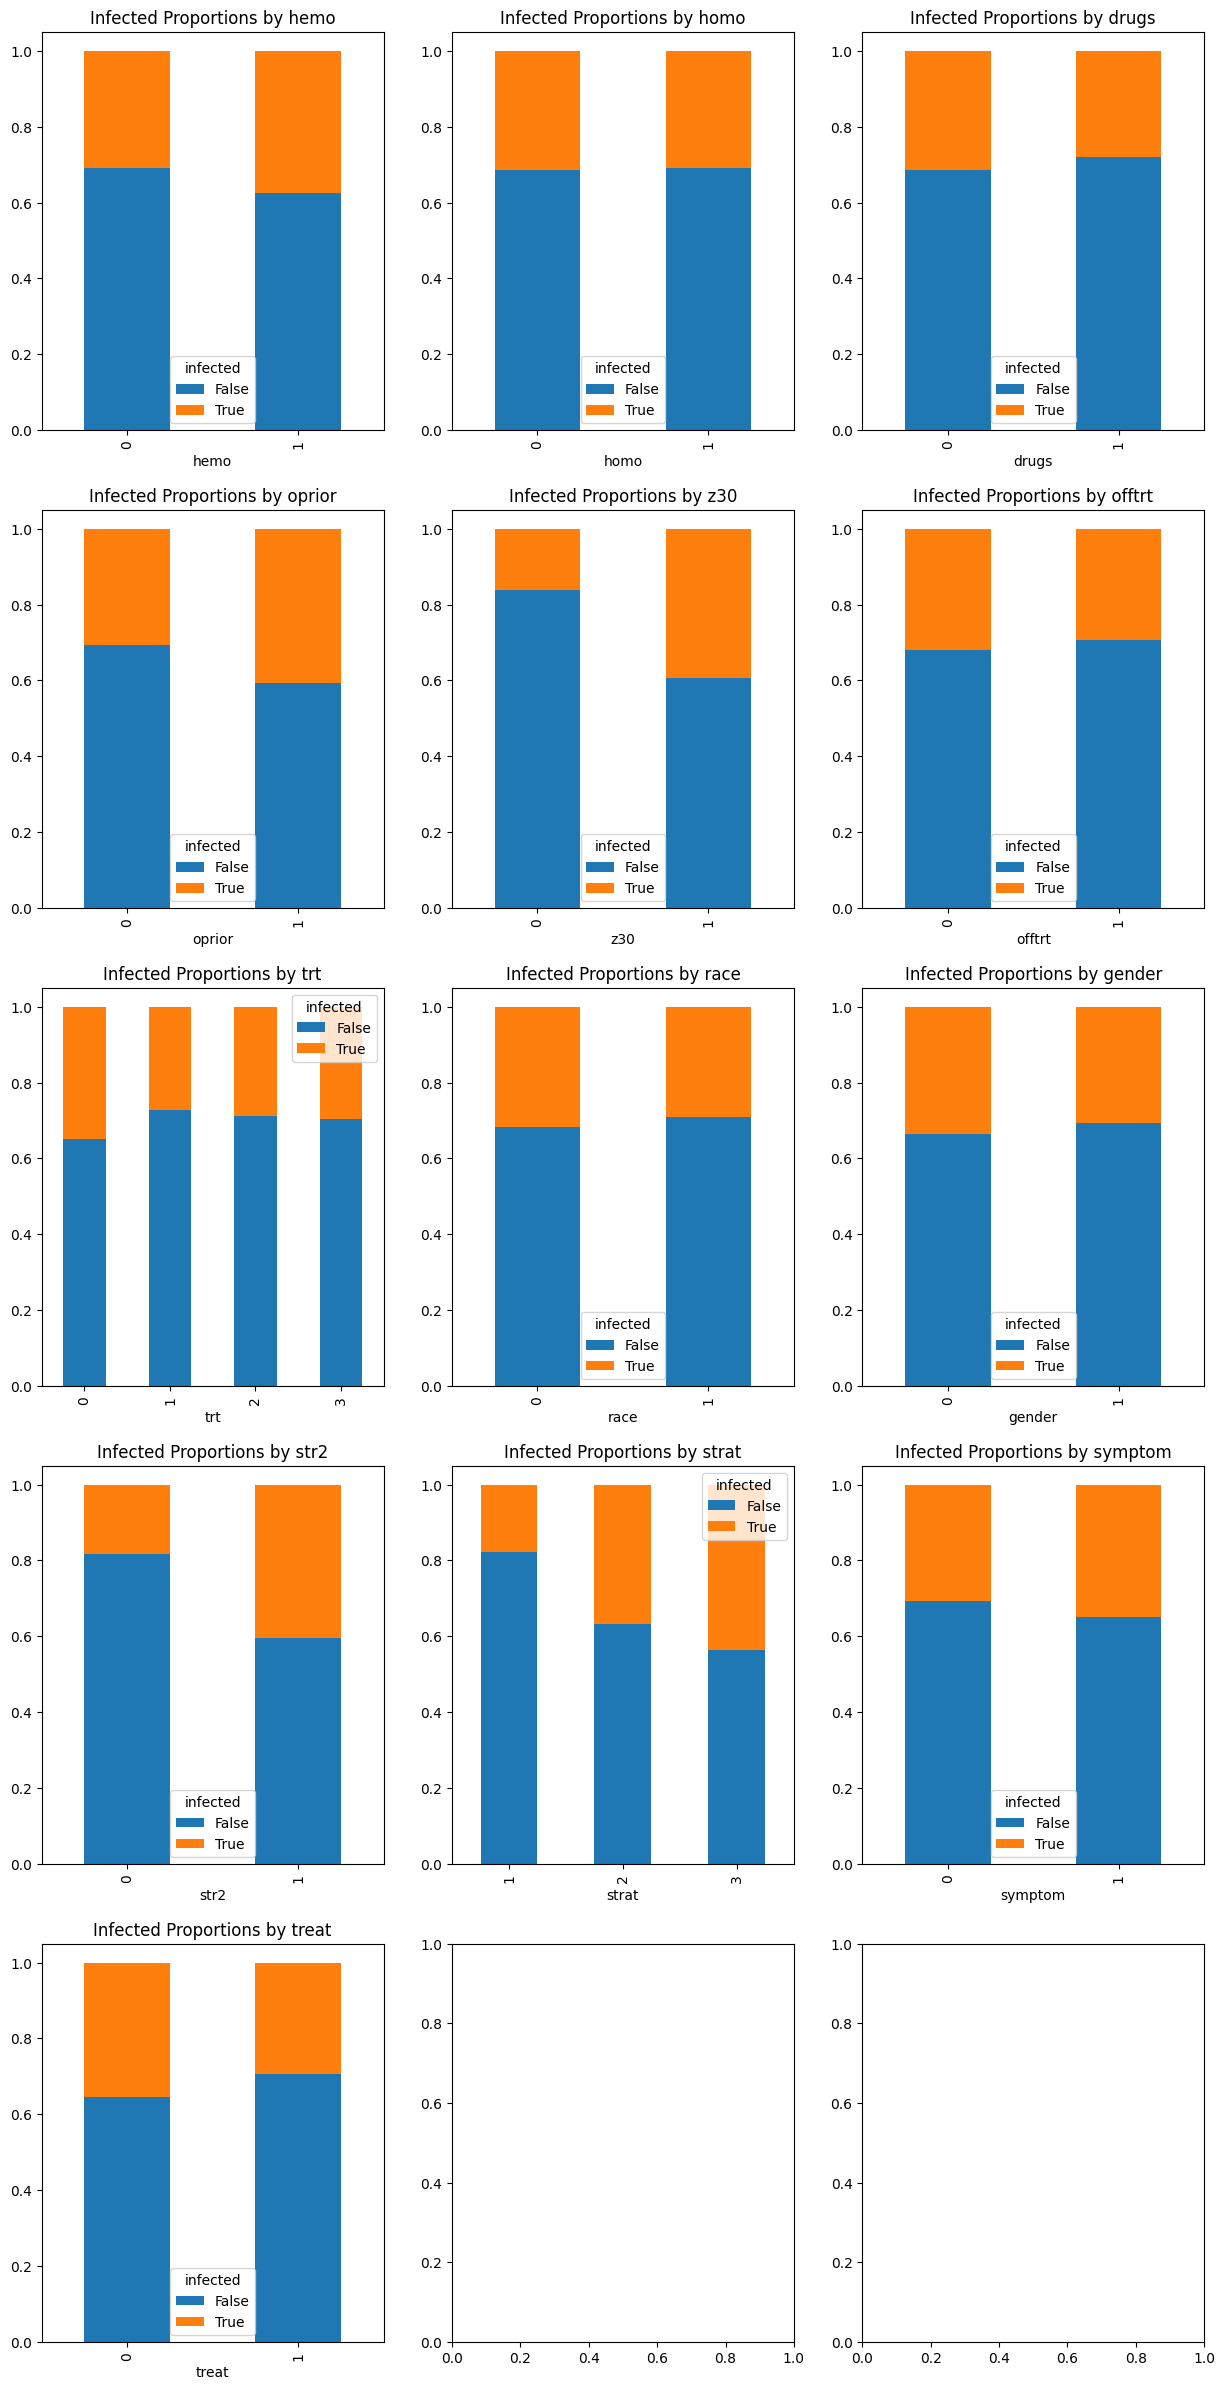

In [ ]:
# Creating figure with set of subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 3, figsize=(15, 30))

#--------------------- first row -------------------------#

# hemo
infected_counts = pd.crosstab([df['hemo']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[0,0])
axs[0,0].set_title('Infected Proportions by hemo')

# homo
infected_counts = pd.crosstab([df['homo']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[0,1])
axs[0,1].set_title('Infected Proportions by homo')

# drugs
infected_counts = pd.crosstab([df['drugs']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[0,2])
axs[0,2].set_title('Infected Proportions by drugs')

#--------------------- second row -------------------------#

# oprior
infected_counts = pd.crosstab([df['oprior']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[1,0])
axs[1,0].set_title('Infected Proportions by oprior')

# z30
infected_counts = pd.crosstab([df['z30']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[1,1])
axs[1,1].set_title('Infected Proportions by z30')

# offtrt
infected_counts = pd.crosstab([df['offtrt']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[1,2])
axs[1,2].set_title('Infected Proportions by offtrt')

#--------------------- third row -------------------------#

# trt
infected_counts = pd.crosstab([df['trt']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[2,0])
axs[2,0].set_title('Infected Proportions by trt')

# race
infected_counts = pd.crosstab([df['race']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[2,1])
axs[2,1].set_title('Infected Proportions by race')

# gender
infected_counts = pd.crosstab([df['gender']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[2,2])
axs[2,2].set_title('Infected Proportions by gender')

#--------------------- fourth row -------------------------#

# str2
infected_counts = pd.crosstab([df['str2']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[3,0])
axs[3,0].set_title('Infected Proportions by str2')

# strat
infected_counts = pd.crosstab([df['strat']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[3,1])
axs[3,1].set_title('Infected Proportions by strat')

# symptom
infected_counts = pd.crosstab([df['symptom']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[3,2])
axs[3,2].set_title('Infected Proportions by symptom')

#--------------------- fifth row -------------------------#

# treat
infected_counts = pd.crosstab([df['treat']],
                              df.infected.astype(bool))
infected_rate = infected_counts.div(infected_counts.sum(1).astype(float),axis=0)
infected_rate.plot(kind='bar',
                   stacked=True,
                   ax=axs[4,0])
axs[4,0].set_title('Infected Proportions by treat')

## Model and Evaluation Option B: Association Rule Mining


Many of the variables are categorical, but the categories are numbers that mean something specific. To make the data clearer, replace the numbers with more descriptive variable names.

In [ ]:
# Re-label the trt variable
df['trt'] = df['trt'].replace(0, '0: ZDV only')
df['trt'] = df['trt'].replace(1, '1: ZDV + ddl')
df['trt'] = df['trt'].replace(2, '2: ZDV + Zal')
df['trt'] = df['trt'].replace(3, '3: ddl only')

# Re-label the race variable
df['race'] = df['race'].replace(0, '0: white')
df['race'] = df['race'].replace(1, '1: non-white')

# Re-label the gender variable
df['gender'] = df['gender'].replace(0, '0: Female')
df['gender'] = df['gender'].replace(1, '1: Male')

# Re-label the str2 variable
df['str2'] = df['str2'].replace(0, '0: naive')
df['str2'] = df['str2'].replace(1, '1: experienced')

# Re-label the strat variable
df['strat'] = df['strat'].replace(1, '1: Antiretroviral Naive')
df['strat'] = df['strat'].replace(2, '2: <= 52 weeks')
df['strat'] = df['strat'].replace(3, '3: > 52 weeks')

# Re-label the symptom variable
df['symptom'] = df['symptom'].replace(0, '0: asymp')
df['symptom'] = df['symptom'].replace(1, '1: symp')

# Re-label the treat variable
df['treat'] = df['treat'].replace(0, '0: ZDV only')
df['treat'] = df['treat'].replace(1, '1: others')

# Relabel 1/0 as yes/no
df['hemo'] = df['hemo'].replace(0, '0: No')
df['hemo'] = df['hemo'].replace(1, '1: Yes')
df['homo'] = df['homo'].replace(0, '0: No')
df['homo'] = df['homo'].replace(1, '1: Yes')
df['drugs'] = df['drugs'].replace(0, '0: No')
df['drugs'] = df['drugs'].replace(1, '1: Yes')
df['oprior'] = df['oprior'].replace(0, '0: No')
df['oprior'] = df['oprior'].replace(1, '1: Yes')
df['z30'] = df['z30'].replace(0, '0: No')
df['z30'] = df['z30'].replace(1, '1: Yes')
df['offtrt'] = df['offtrt'].replace(0, '0: No')
df['offtrt'] = df['offtrt'].replace(1, '1: Yes')
df['infected'] = df['infected'].replace(0, '0: No')
df['infected'] = df['infected'].replace(1, '1: Yes')

# Make 0 / 1 (i.e. True / False) columns categorical
df['hemo'] = pd.Categorical(df['hemo'])
df['homo'] = pd.Categorical(df['homo'])
df['drugs'] = pd.Categorical(df['drugs'])
df['oprior'] = pd.Categorical(df['oprior'])
df['z30'] = pd.Categorical(df['z30'])
df['offtrt'] = pd.Categorical(df['offtrt'])
df['infected'] = pd.Categorical(df['infected'])
df['trt'] = pd.Categorical(df['trt'])
df['race'] = pd.Categorical(df['race'])
df['gender'] = pd.Categorical(df['gender'])
df['str2'] = pd.Categorical(df['str2'])
df['strat'] = pd.Categorical(df['strat'])
df['symptom'] = pd.Categorical(df['symptom'])
df['treat'] = pd.Categorical(df['treat'])

### Train: Create frequent itemsets and association rules (adjust parameters).

### **David**

,support,itemsets
0,0.99996,(0: No)
1,0.95284,(1: Yes)
2,0.91654,(0: asymp)
3,0.85670,(1: Male)
4,0.73416,(1: others)
...,...,...
31936,0.01042,"(21, 0: asymp)"
31937,0.01062,"(0: No, 21, 1: Yes)"
31938,0.01004,"(0: No, 21, 1: Male)"
31939,0.01042,"(0: No, 21, 0: asymp)"


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
687790,"(0: Female, 0: naive, 1: Antiretroviral Naive,...","(0, 1: non-white)",0.04010,0.09114,0.01164,0.290274,3.184928,7.985286e-03,1.280579,7.146798e-01
687859,"(0: naive, 0: No, 0: Female, 1: Antiretroviral...","(0, 1: non-white)",0.04010,0.09114,0.01164,0.290274,3.184928,7.985286e-03,1.280579,7.146798e-01
687887,"(0: Female, 0: naive, 1: Antiretroviral Naive,...","(0, 0: No, 1: non-white)",0.04010,0.09114,0.01164,0.290274,3.184928,7.985286e-03,1.280579,7.146798e-01
687815,"(0, 1: non-white)","(0: Female, 0: naive, 1: Antiretroviral Naive,...",0.09114,0.04010,0.01164,0.127716,3.184928,7.985286e-03,1.100444,7.548150e-01
687906,"(0, 0: No, 1: non-white)","(0: Female, 0: naive, 1: Antiretroviral Naive,...",0.09114,0.04010,0.01164,0.127716,3.184928,7.985286e-03,1.100444,7.548150e-01
...,...,...,...,...,...,...,...,...,...,...
571,(0: No),"(1: others, 100)",0.99996,0.50664,0.50662,0.506640,1.000001,2.656000e-07,1.000001,1.310647e-02
1242744,"(0, 35)",(0: asymp),0.01318,0.91654,0.01208,0.916540,1.000000,2.800000e-09,1.000003,2.348838e-07
1242752,"(0, 0: No, 35)",(0: asymp),0.01318,0.91654,0.01208,0.916540,1.000000,2.800000e-09,1.000003,2.348838e-07
1242745,(0: asymp),"(0, 35)",0.91654,0.01318,0.01208,0.013180,1.000000,2.800000e-09,1.000000,2.777236e-06


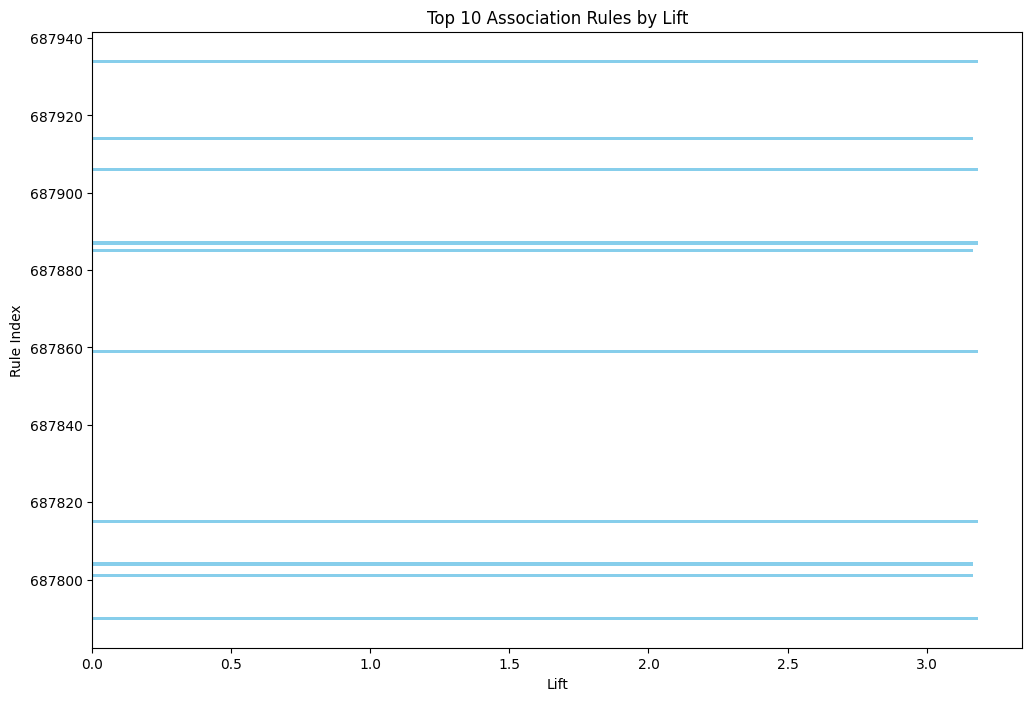

(       support               itemsets
 0      0.99996                (0: No)
 1      0.95284               (1: Yes)
 2      0.91654             (0: asymp)
 3      0.85670              (1: Male)
 4      0.73416            (1: others)
 ...        ...                    ...
 31936  0.01042         (21, 0: asymp)
 31937  0.01062    (0: No, 21, 1: Yes)
 31938  0.01004   (0: No, 21, 1: Male)
 31939  0.01042  (0: No, 21, 0: asymp)
 31940  0.01030             (0: No, 9)
 
 [31941 rows x 2 columns],
                                                antecedents  \
 687790   (0: Female, 0: naive, 1: Antiretroviral Naive,...   
 687859   (0: naive, 0: No, 0: Female, 1: Antiretroviral...   
 687887   (0: Female, 0: naive, 1: Antiretroviral Naive,...   
 687815                                   (0, 1: non-white)   
 687906                            (0, 0: No, 1: non-white)   
 ...                                                    ...   
 571                                                (0: No)   

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
from IPython.display import display



# Include the 'infected' column in transactions
transactions_df = df.astype(str)  # Convert all values to strings for consistency
transactions = transactions_df.values.tolist()

# Apply Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(df_transformed, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Evaluate and sort rules by different metrics
rules = rules.sort_values(by=['lift', 'confidence'], ascending=False)

# Visualize the top 10 rules by lift
top_rules = rules.head(10)

# Display the results
display(frequent_itemsets)
display(rules)

# Plot top 10 rules
plt.figure(figsize=(12, 8))
plt.barh(top_rules.index, top_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Rule Index')
plt.title('Top 10 Association Rules by Lift')
plt.show()

# Display the frequent itemsets and association rules
frequent_itemsets, rules


#### Infected = Yes

Since `infected = Yes (has AIDS)` is the most important, we will try to focus on categories that lead to that happening.  We will use the information from the plots we gathered from data visualization.  Along with the information we gained on important features as part of previous labs.

Our dataset has 50,000 entries.  We chose a minsup of 0.02, which is 1,000 entries.

In [ ]:
minsup = 1000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


First we will examine the strat variable, since `strat = 3 (> 52 weeks)` had the highest proportion of `infected = Yes (has AIDS)`.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-2133fb136304>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat'])


Text(0.5, 1.0, 'Support count for all strat itemsets')

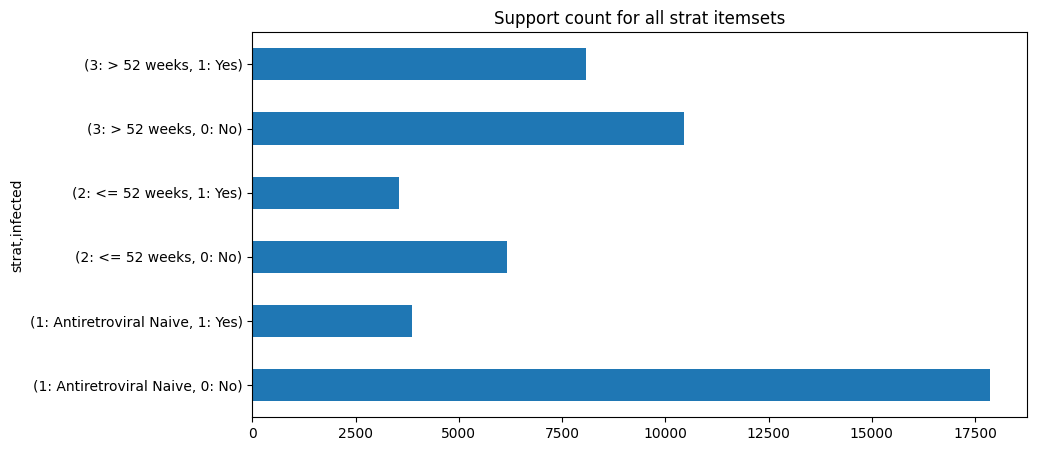

In [ ]:
# Examine strat
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,5))
df_grouped = df.groupby(by=['strat'])
ax = df_grouped.infected.value_counts().plot(kind='barh')
plt.title('Support count for all strat itemsets')

All (strat, infected) items are frequent, since their count is above 1,000.

(strat = 1: Antiretroviral Naive, infected = 0: No)  
(strat = 1: Antiretroviral Naive, infected = 1: Yes)  
(strat = 2: <= 52 weeks, infected = 0: No)  
(strat = 2: <= 52 weeks, infected = 1: Yes)  
(strat = 3: > 52 weeks, infected = 0: No)  
(strat = 3: > 52 weeks, infected = 1: Yes)  

Notice how for `strat = 3 (> 52 weeks)` that the `infected = No (no AIDS)` and `infected = Yes (has AIDS)` bars are closer to each other in magnitude.

Next we'll add the z30 variable, since `z30 = 1` had a high proportion `infected = Yes (has AIDS)`.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-7682f7bf6b21>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30'])


Text(0.5, 1.0, 'Support count for all strat + z30 itemsets')

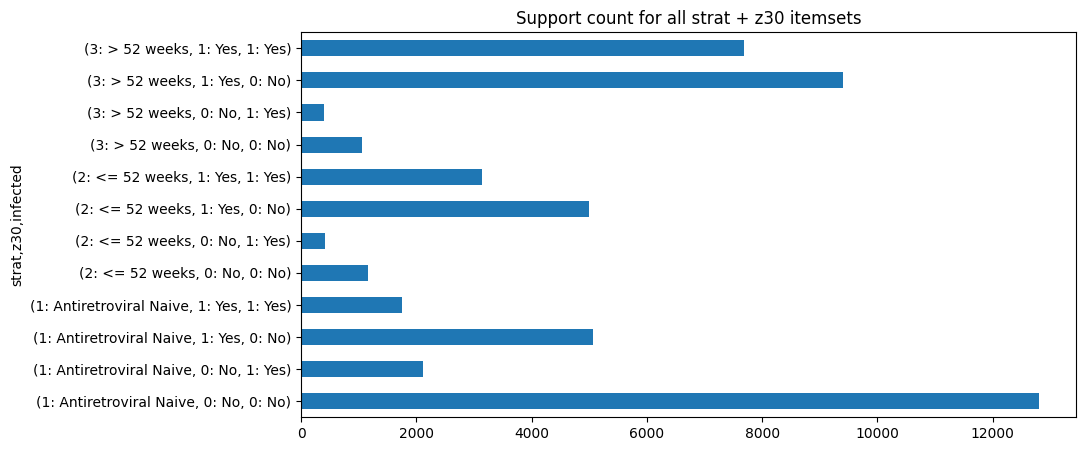

In [ ]:
# Add z30
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,5))
df_grouped = df.groupby(by=['strat','z30'])
ax = df_grouped.infected.value_counts().plot(kind='barh')
plt.title('Support count for all strat + z30 itemsets')

Most of the itemsets with strat and z30 are still frequent, but a couple aren't.

(strat = 1: Antiretroviral Naive, infected = 0: No)  
(strat = 1: Antiretroviral Naive, infected = 1: Yes)  
(strat = 1: Antiretroviral Naive, z30 = 0: No, infected = 0: No)  
(strat = 1: Antiretroviral Naive, z30 = 0: No, infected = 1: Yes)  
(strat = 1: Antiretroviral Naive, z30 = 1: Yes, infected = 0: No)  
(strat = 1: Antiretroviral Naive, z30 = 1: Yes, infected = 1: Yes)  
(strat = 2: <= 52 weeks, infected = 0: No)  
(strat = 2: <= 52 weeks, infected = 1: Yes)  
(strat = 2: <= 52 weeks, z30 = 0: No, infected = 0: No)  
(strat = 2: <= 52 weeks, z30 = 0: No, infected = 1: Yes)  
(strat = 2: <= 52 weeks, z30 = 1: Yes, infected = 0: No)  
(strat = 2: <= 52 weeks, z30 = 1: Yes, infected = 1: Yes)  
(strat = 3: > 52 weeks, infected = 0: No)  
(strat = 3: > 52 weeks, infected = 1: Yes)  
(strat = 3: > 52 weeks, z30 = 0: No, infected = 0: No)  
(strat = 3: > 52 weeks, z30 = 0: No, infected = 1: Yes)  
(strat = 3: > 52 weeks, z30 = 1: Yes, infected = 0: No)  
(strat = 3: > 52 weeks, z30 = 1: Yes, infected = 1: Yes)  

Notice how for `strat = 3 (> 52 weeks)` and `z30 = 1` has the highest magnitude with `infected = Yes (has AIDS)`.

Next we'll add the trt variable, since it was added to many models.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-3ac7f2181990>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt'])


Text(0.5, 1.0, 'Support count for all strat + z30 + trt itemsets')

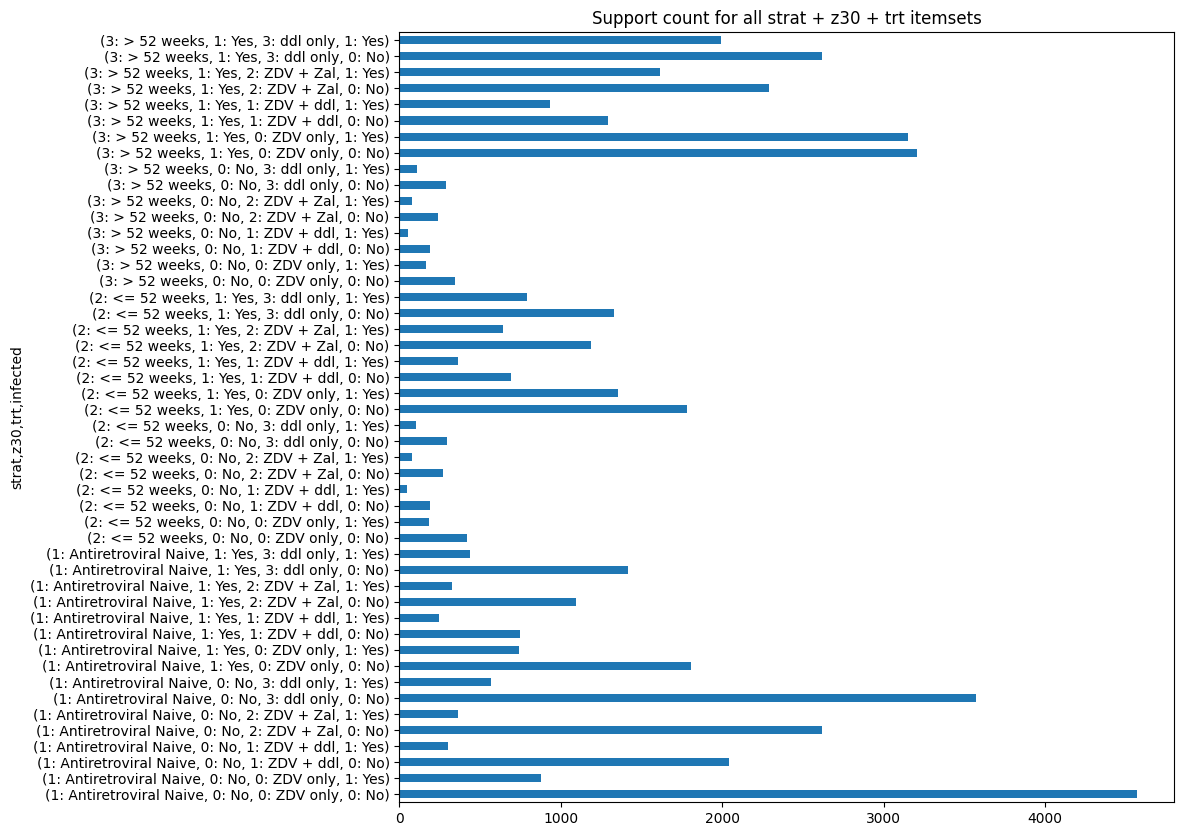

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,10))
df_grouped = df.groupby(by=['strat','z30','trt'])
ax = df_grouped.infected.value_counts().plot(kind='barh')
plt.title('Support count for all strat + z30 + trt itemsets')

Many of these datasets are not frequent.

(strat = 1, infected = 0: No)  
(strat = 1, infected = 1: Yes)  
(strat = 1, z30 = 0: No, infected = 0: No)  
(strat = 1, z30 = 0: No, infected = 1: Yes)  
(strat = 1, z30 = 0: No, trt = 0: ZDV only, infected = 0: No)  
(strat = 1, z30 = 0: No, trt = 1: ZDV + ddl, infected = 0: No)  
(strat = 1, z30 = 0: No, trt = 2: ZDV + Zal, infected = 0: No)  
(strat = 1, z30 = 0: No, trt = 3: ddl only, infected = 0: No)  
(strat = 1, z30 = 1: Yes, infected = 0: No)  
(strat = 1, z30 = 1: Yes, infected = 1: Yes)  
(strat = 1, z30 = 1: Yes, trt = 0: ZDV only, infected = 0: No)  
(strat = 1, z30 = 1: Yes, trt = 2: ZDV + Zal, infected = 0: No)  
(strat = 1, z30 = 1: Yes, trt = 3: ddl only, infected = 0: No)  
(strat = 2, infected = 0: No)  
(strat = 2, infected = 1: Yes)  
(strat = 2, z30 = 0: No, infected = 0: No)  
(strat = 2, z30 = 0: No, infected = 1: Yes)  
(strat = 2, z30 = 1: Yes, infected = 0: No)  
(strat = 2, z30 = 1: Yes, infected = 1: Yes)  
(strat = 2, z30 = 1: Yes, trt = 0: ZDV only, infected = 0: No)  
(strat = 2, z30 = 1: Yes, trt = 0: ZDV only, infected = 1: Yes)  
(strat = 2, z30 = 1: Yes, trt = 2: ZDV + Zal, infected = 0: No)  
(strat = 2, z30 = 1: Yes, trt = 3: ddl only, infected = 0: No)  
(strat = 3, infected = 0: No)  
(strat = 3, infected = 1: Yes)  
(strat = 3, z30 = 0: No, infected = 0: No)  
(strat = 3, z30 = 0: No, infected = 1: Yes)  
(strat = 3, z30 = 1: Yes, infected = 0: No)  
(strat = 3, z30 = 1: Yes, infected = 1: Yes)  
(strat = 3, z30 = 1: Yes, trt = 0: ZDV only, infected = 0: No)  
(strat = 3, z30 = 1: Yes, trt = 0: ZDV only, infected = 1: Yes)  
(strat = 3, z30 = 1: Yes, trt = 1: ZDV + ddl, infected = 0: No)  
(strat = 3, z30 = 1: Yes, trt = 2: ZDV + Zal, infected = 0: No)  
(strat = 3, z30 = 1: Yes, trt = 2: ZDV + Zal, infected = 1: Yes)  
(strat = 3, z30 = 1: Yes, trt = 3: ddl only, infected = 0: No)  
(strat = 3, z30 = 1: Yes, trt = 3: ddl only, infected = 1: Yes)  

Notice how there are only 4 itemsets with `infected = Yes (has AIDS)`: 0 with `strat = 1 (Antivirol Naive)`, 1 with `strat = 2 (<= 52 weeks)`, and 3 with `strat = 3 (> 52 weeks)`

Next we will add the trt variable, since it was added to many models. Now that there are so many possible itemsets, we will just display the ones with counts above the minsup value.

In [ ]:
import matplotlib.pyplot as plt
df_grouped = df.groupby(by=['strat','z30','trt','offtrt'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-9-7885c34f52c8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt'])['infected'].value_counts()


,strat,z30,trt,offtrt,infected,count
0,1: Antiretroviral Naive,0: No,0: ZDV only,0: No,0: No,2910
2,1: Antiretroviral Naive,0: No,0: ZDV only,1: Yes,0: No,1662
4,1: Antiretroviral Naive,0: No,1: ZDV + ddl,0: No,0: No,1364
8,1: Antiretroviral Naive,0: No,2: ZDV + Zal,0: No,0: No,1709
12,1: Antiretroviral Naive,0: No,3: ddl only,0: No,0: No,2447
14,1: Antiretroviral Naive,0: No,3: ddl only,1: Yes,0: No,1126
16,1: Antiretroviral Naive,1: Yes,0: ZDV only,0: No,0: No,1099
48,2: <= 52 weeks,1: Yes,0: ZDV only,0: No,0: No,1081
80,3: > 52 weeks,1: Yes,0: ZDV only,0: No,1: Yes,2177
81,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: No,2052


(strat = 1, infected = 0: No)  
(strat = 1, infected = 1: Yes)  
(strat = 1, z30 = 0, infected = 0: No)  
(strat = 1, z30 = 0, infected = 1: Yes)  
(strat = 1, z30 = 0, trt = 0: ZDV only, infected = 0: No)  
(strat = 1, z30 = 0, trt = 0: ZDV only, offtrt = 0: No, infected = 0: No)  
(strat = 1, z30 = 0, trt = 0: ZDV only, offtrt = 1: Yes, infected = 0: No)  
(strat = 1, z30 = 0, trt = 1: ZDV + ddl, infected = 0: No)  
(strat = 1, z30 = 0, trt = 1: ZDV + ddl, offtrt = 0: No, infected = 0: No)  
(strat = 1, z30 = 0, trt = 2: ZDV + Zal, infected = 0: No)  
(strat = 1, z30 = 0, trt = 2: ZDV + Zal, offtrt = 0: No, infected = 0: No)  
(strat = 1, z30 = 0, trt = 3: ddl only, infected = 0: No)  
(strat = 1, z30 = 0, trt = 3: ddl only, offtrt = 0: No, infected = 0: No)  
(strat = 1, z30 = 0, trt = 3: ddl only, offtrt = 1: Yes, infected = 0: No)  
(strat = 1, z30 = 1, infected = 0: No)  
(strat = 1, z30 = 1, infected = 1: Yes)  
(strat = 1, z30 = 1, trt = 0: ZDV only, infected = 0: No)  
(strat = 1, z30 = 1, trt = 0: ZDV only, offtrt = 0: No, infected = 0: No)  
(strat = 2, infected = 0: No)  
(strat = 2, infected = 1: Yes)  
(strat = 2, z30 = 1, infected = 0: No)  
(strat = 2, z30 = 1, infected = 1: Yes)  
(strat = 2, z30 = 1, trt = 0: ZDV only, infected = 0: No)  
(strat = 2, z30 = 1, trt = 0: ZDV only, infected = 1: Yes)  
(strat = 2, z30 = 1, trt = 0: ZDV only, offtrt = 0: No, infected = 0: No)  
(strat = 3, infected = 0: No)  
(strat = 3, infected = 1: Yes)  
(strat = 3, z30 = 1, infected = 0: No)  
(strat = 3, z30 = 1, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 0: ZDV only, infected = 0: No)  
(strat = 3, z30 = 1, trt = 0: ZDV only, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 0: ZDV only, offtrt = 0: No, infected = 0: No)  
(strat = 3, z30 = 1, trt = 0: ZDV only, offtrt = 0: No, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 0: ZDV only, offtrt = 1: Yes, infected = 0: No)  
(strat = 3, z30 = 1, trt = 2: ZDV + Zal, infected = 0: No)  
(strat = 3, z30 = 1, trt = 2: ZDV + Zal, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 2: ZDV + Zal, offtrt = 0: No, infected = 0: No)  
(strat = 3, z30 = 1, trt = 2: ZDV + Zal, offtrt = 0: No, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 3: ddl only, infected = 0: No)  
(strat = 3, z30 = 1, trt = 3: ddl only, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 3: ddl only, offtrt = 0: No, infected = 0: No)  
(strat = 3, z30 = 1, trt = 3: ddl only, offtrt = 0: No, infected = 1: Yes)  

Now there are only 3 itemsets with `infected = Yes (has AIDS)`, all with `strat = 3 (> 52 weeks)`.  Notice how the itemset (strat = 1, z30 = 1, trt = 0, offtrt = 0), there are more items with `infected = Yes (has AIDS)` than with `infected = No (no AIDS)`.  This is the smallest itemset where this happened.

Next we will add the race variable, since it was added to some models.

In [ ]:
import matplotlib.pyplot as plt
df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-7171485da5bb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race'])['infected'].value_counts()


,strat,z30,trt,offtrt,race,infected,count
0,1: Antiretroviral Naive,0: No,0: ZDV only,0: No,0: white,0: No,1830
2,1: Antiretroviral Naive,0: No,0: ZDV only,0: No,1: non-white,0: No,1080
16,1: Antiretroviral Naive,0: No,2: ZDV + Zal,0: No,0: white,0: No,1160
24,1: Antiretroviral Naive,0: No,3: ddl only,0: No,0: white,0: No,1682
160,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,1: Yes,1668
161,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,0: No,1559
176,3: > 52 weeks,1: Yes,2: ZDV + Zal,0: No,0: white,0: No,1245
184,3: > 52 weeks,1: Yes,3: ddl only,0: No,0: white,0: No,1458
185,3: > 52 weeks,1: Yes,3: ddl only,0: No,0: white,1: Yes,1191


(3, infected = 0: No)  
(3, infected = 1: Yes)  
(3, z30 = 0, infected = 0: No)  
(3, z30 = 0, infected = 1: Yes)  
(3, z30 = 1, infected = 0: No)  
(3, z30 = 1, infected = 1: Yes)  
(3, z30 = 1, trt = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0: white, infected = 0: No)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0: white, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 1, infected = 0: No)  
(3, z30 = 1, trt = 1, infected = 0: No)  
(3, z30 = 1, trt = 2, infected = 0: No)  
(3, z30 = 1, trt = 2, infected = 1: Yes)  
(3, z30 = 1, trt = 2, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 2, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 2, offtrt = 0, race = 0: white, infected = 0: No)  
(3, z30 = 1, trt = 3, infected = 0: No)  
(3, z30 = 1, trt = 3, infected = 1: Yes)  
(3, z30 = 1, trt = 3, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 3, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0: white, infected = 0: No)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0: white, infected = 1: Yes)  

Now there are only 3 itemsets with `infected = Yes (has AIDS)`.

Next we will add the drugs variable, since it was added to some models.

In [ ]:
import matplotlib.pyplot as plt
df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
df_grouped

<ipython-input-13-ce4823fcf24a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs'])['infected'].value_counts()


,strat,z30,trt,offtrt,race,drugs,infected,count
0,1: Antiretroviral Naive,0: No,0: ZDV only,0: No,0: white,0: No,0: No,1616
32,1: Antiretroviral Naive,0: No,2: ZDV + Zal,0: No,0: white,0: No,0: No,1001
48,1: Antiretroviral Naive,0: No,3: ddl only,0: No,0: white,0: No,0: No,1472
320,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,0: No,1: Yes,1499
321,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,0: No,0: No,1388
352,3: > 52 weeks,1: Yes,2: ZDV + Zal,0: No,0: white,0: No,0: No,1119
368,3: > 52 weeks,1: Yes,3: ddl only,0: No,0: white,0: No,0: No,1312
369,3: > 52 weeks,1: Yes,3: ddl only,0: No,0: white,0: No,1: Yes,1085


(3, infected = 0: No)  
(3, infected = 1: Yes)   
(3, z30 = 1, infected = 0: No)  
(3, z30 = 1, infected = 1: Yes)  
(3, z30 = 1, trt = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0, drugs = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 3, infected = 0: No)  
(3, z30 = 1, trt = 3, infected = 1: Yes)  
(3, z30 = 1, trt = 3, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 3, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0, infected = 0: No)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0, drugs = 0, infected = 1: Yes)  

Next we will add the oprior variable, since it was added to some models.

In [ ]:
import matplotlib.pyplot as plt
df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
df_grouped

<ipython-input-14-334612b6ad09>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior'])['infected'].value_counts()


,strat,z30,trt,offtrt,race,drugs,oprior,infected,count
0,1: Antiretroviral Naive,0: No,0: ZDV only,0: No,0: white,0: No,0: No,0: No,1576
96,1: Antiretroviral Naive,0: No,3: ddl only,0: No,0: white,0: No,0: No,0: No,1436
640,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,0: No,0: No,1: Yes,1407
641,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,0: No,0: No,0: No,1310
704,3: > 52 weeks,1: Yes,2: ZDV + Zal,0: No,0: white,0: No,0: No,0: No,1065
736,3: > 52 weeks,1: Yes,3: ddl only,0: No,0: white,0: No,0: No,0: No,1238


(3, infected = 0: No)  
(3, infected = 1: Yes)   
(3, 1, infected = 0: No)  
(3, 1, infected = 1: Yes)  
(3, 1, 0, infected = 0: No)  
(3, 1, 0, infected = 1: Yes)  
(3, 1, 0, offtrt = 0, infected = 0: No)  
(3, 1, 0, offtrt = 0, infected = 1: Yes)  
(3, 1, 0, offtrt = 0, race = 0, infected = 0: No)  
(3, 1, 0, offtrt = 0, race = 0, infected = 1: Yes)  
(3, 1, 0, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, 1, 0, offtrt = 0, race = 0, drugs = 0, infected = 1: Yes)  
(3, 1, 0, offtrt = 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(3, 1, 0, offtrt = 0, race = 0, drugs = 0, oprior = 0, infected = 1: Yes)  
(3, 1, 2, infected = 0: No)  
(3, 1, 2, infected = 1: Yes)  
(3, 1, 2, offtrt = 0, infected = 0: No)  
(3, 1, 2, offtrt = 0, infected = 1: Yes)  
(3, 1, 2, offtrt = 0, race = 0, infected = 0: No)  
(3, 1, 2, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, 1, 2, offtrt = 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(3, 1, 3, infected = 0: No)  
(3, 1, 3, infected = 1: Yes)  
(3, 1, 3, offtrt = 0, infected = 0: No)  
(3, 1, 3, offtrt = 0, infected = 1: Yes)  
(3, 1, 3, offtrt = 0, race = 0, infected = 0: No)  
(3, 1, 3, offtrt = 0, race = 0, infected = 1: Yes)  
(3, 1, 3, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, 1, 3, offtrt = 0, race = 0, drugs = 0, infected = 1: Yes)  
(3, 1, 3, offtrt = 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  


Next we will add the homo variable, since it was added to some models.

In [ ]:
import matplotlib.pyplot as plt
df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior','homo'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
df_grouped

<ipython-input-15-7e2cbe6485eb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior','homo'])['infected'].value_counts()


,strat,z30,trt,offtrt,race,drugs,oprior,homo,infected,count
2,1: Antiretroviral Naive,0: No,0: ZDV only,0: No,0: white,0: No,0: No,1: Yes,0: No,1162
194,1: Antiretroviral Naive,0: No,3: ddl only,0: No,0: white,0: No,0: No,1: Yes,0: No,1153
1282,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,0: No,0: No,1: Yes,1: Yes,1032


(3, infected = 0: No)  
(3, infected = 1: Yes)  
(3, 1, infected = 0: No)  
(3, 1, infected = 1: Yes)  
(3, 1, 0, infected = 0: No)  
(3, 1, 0, infected = 1: Yes)  
(3, 1, 0, 0, infected = 0: No)  
(3, 1, 0, 0, infected = 1: Yes)  
(3, 1, 0, 0, race = 0, infected = 0: No)  
(3, 1, 0, 0, race = 0, infected = 1: Yes)  
(3, 1, 0, 0, race = 0, drugs = 0, infected = 0: No)  
(3, 1, 0, 0, race = 0, drugs = 0, infected = 1: Yes)  
(3, 1, 0, 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(3, 1, 0, 0, race = 0, drugs = 0, oprior = 0, infected = 1: Yes)  
(3, 1, 0, 0, race = 0, drugs = 0, oprior = 0, homo = 1, infected = 1: Yes)  


There are only 3 items left, and only 1 of them has `infected = Yes (has AIDS)`.

Next we will add the homo variable, since it was added to some models.

In [ ]:
import matplotlib.pyplot as plt
df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior','homo', 'symptom'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
df_grouped

<ipython-input-16-39b25a178a69>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior','homo', 'symptom'])['infected'].value_counts()


,strat,z30,trt,offtrt,race,drugs,oprior,homo,symptom,infected,count
4,1: Antiretroviral Naive,0: No,0: ZDV only,0: No,0: white,0: No,0: No,1: Yes,0: asymp,0: No,1067
388,1: Antiretroviral Naive,0: No,3: ddl only,0: No,0: white,0: No,0: No,1: Yes,0: asymp,0: No,1050


### Eval: Use several measures for evaluating how interesting different rules are.

#### Infected = Yes

One metric to look at, is the percentage of `infected = Yes (has AIDS)`.

In [ ]:
minsup = 1000
df_grouped = df.groupby(by=['strat'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
total_counts = df_grouped.groupby(by=['strat'])['count'].transform('sum')
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100
df_grouped = df_grouped[df_grouped['infected'] == '1: Yes']
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-5745d01e6238>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat'])['infected'].value_counts()
<ipython-input-11-5745d01e6238>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df_grouped.groupby(

,strat,infected,count,percentage
1,1: Antiretroviral Naive,1: Yes,3858,17.754257
3,2: <= 52 weeks,1: Yes,3559,36.618994
5,3: > 52 weeks,1: Yes,8089,43.604118


The largest one is for `strat = 3: > 52 weeks`.

In [ ]:
df_grouped = df.groupby(by=['strat','z30'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
total_counts = df_grouped.groupby(by=['strat','z30'])['count'].transform('sum')
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100
df_grouped = df_grouped[df_grouped['infected'] == '1: Yes']
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-ba027a0ff5b4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30'])['infected'].value_counts()
<ipython-input-25-ba027a0ff5b4>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df_grouped.gr

,strat,z30,infected,count,percentage
1,1: Antiretroviral Naive,0: No,1: Yes,2108,14.135318
3,1: Antiretroviral Naive,1: Yes,1: Yes,1750,25.671116
7,2: <= 52 weeks,1: Yes,1: Yes,3145,38.650608
11,3: > 52 weeks,1: Yes,1: Yes,7689,44.991223


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


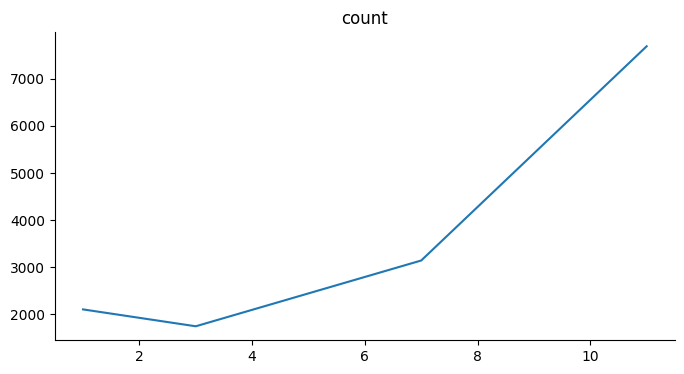

In [ ]:
from matplotlib import pyplot as plt
_df_5['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


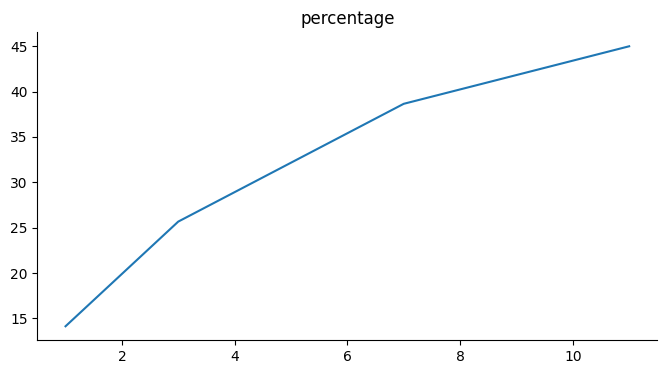

In [ ]:
from matplotlib import pyplot as plt
_df_6['percentage'].plot(kind='line', figsize=(8, 4), title='percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

The (3,1,Yes) itemset has a slightly higher percentage.

In [ ]:
df_grouped = df.groupby(by=['strat','z30','trt'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
total_counts = df_grouped.groupby(by=['strat','z30','trt'])['count'].transform('sum')
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100
df_grouped = df_grouped[df_grouped['infected'] == '1: Yes']
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-cbeefb1e55b9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt'])['infected'].value_counts()
<ipython-input-13-cbeefb1e55b9>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df_grou

,strat,z30,trt,infected,count,percentage
25,2: <= 52 weeks,1: Yes,0: ZDV only,1: Yes,1353,43.144133
41,3: > 52 weeks,1: Yes,0: ZDV only,1: Yes,3153,49.598867
45,3: > 52 weeks,1: Yes,2: ZDV + Zal,1: Yes,1614,41.352806
47,3: > 52 weeks,1: Yes,3: ddl only,1: Yes,1991,43.226227


The (3,1,0) itemset is over 49%, almost half of the infected values are `Yes (has AIDS)`



In [ ]:
df_grouped = df.groupby(by=['strat','z30','trt','offtrt'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
total_counts = df_grouped.groupby(by=['strat','z30','trt','offtrt'])['count'].transform('sum')
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100
df_grouped = df_grouped[df_grouped['infected'] == '1: Yes']
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-e1d8eec40f87>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt'])['infected'].value_counts()
<ipython-input-14-e1d8eec40f87>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts 

,strat,z30,trt,offtrt,infected,count,percentage
80,3: > 52 weeks,1: Yes,0: ZDV only,0: No,1: Yes,2177,51.477891
89,3: > 52 weeks,1: Yes,2: ZDV + Zal,0: No,1: Yes,1144,42.959069
93,3: > 52 weeks,1: Yes,3: ddl only,0: No,1: Yes,1428,44.680851


The (3,1,0,0) itemset has a percentage over 50%.  And it's count is still quite high, double the minsup value.  Since count value will only decrease at this point, this will be the highest count value.

In [ ]:
df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
total_counts = df_grouped.groupby(by=['strat','z30','trt','offtrt','race'])['count'].transform('sum')
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100
df_grouped = df_grouped[df_grouped['infected'] == '1: Yes']
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-0fe8303895bc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race'])['infected'].value_counts()
<ipython-input-15-0fe8303895bc>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_

,strat,z30,trt,offtrt,race,infected,count,percentage
160,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,1: Yes,1668,51.688875
185,3: > 52 weeks,1: Yes,3: ddl only,0: No,0: white,1: Yes,1191,44.960362


The (3,1,0,0,0) percentage value is slightly higher than for (3,1,0,0), but similar.

In [ ]:
df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
total_counts = df_grouped.groupby(by=['strat','z30','trt','offtrt','race','drugs'])['count'].transform('sum')
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100
df_grouped = df_grouped[df_grouped['infected'] == '1: Yes']
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-acc70f0f243e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs'])['infected'].value_counts()
<ipython-input-16-acc70f0f243e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,strat,z30,trt,offtrt,race,drugs,infected,count,percentage
320,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,0: No,1: Yes,1499,51.922411
369,3: > 52 weeks,1: Yes,3: ddl only,0: No,0: white,0: No,1: Yes,1085,45.264914


In [ ]:
df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] >= minsup]
total_counts = df_grouped.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior'])['count'].transform('sum')
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100
df_grouped = df_grouped[df_grouped['infected'] == '1: Yes']
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-3abbb6e83b65>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior'])['infected'].value_counts()
<ipython-input-17-3abbb6e83b65>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

,strat,z30,trt,offtrt,race,drugs,oprior,infected,count,percentage
640,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,0: No,0: No,1: Yes,1407,51.785057


The percentage value was slightly lower this time, but still above 50%.

In [ ]:
df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior','homo'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
total_counts = df_grouped.groupby(by=['strat', 'z30', 'trt', 'offtrt','race','drugs','oprior','homo'])['count'].transform('sum')
df_grouped = df_grouped[df_grouped['count'] >= 1000]
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100
df_grouped = df_grouped[df_grouped['infected'] == '1: Yes']
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-a9f38afad92e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','oprior','homo'])['infected'].value_counts()
<ipython-input-18-a9f38afad92e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

,strat,z30,trt,offtrt,race,drugs,oprior,homo,infected,count,percentage
1282,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,0: No,0: No,1: Yes,1: Yes,1032,51.88537


In [ ]:
df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','homo'])['infected'].value_counts()
df_grouped = df_grouped.reset_index(name='count')
total_counts = df_grouped.groupby(by=['strat', 'z30', 'trt', 'offtrt','race','drugs','homo'])['count'].transform('sum')
df_grouped = df_grouped[df_grouped['count'] >= 1000]
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100
df_grouped = df_grouped[df_grouped['infected'] == '1: Yes']
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-937b84ca491b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['strat','z30','trt','offtrt','race','drugs','homo'])['infected'].value_counts()
<ipython-input-19-937b84ca491b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

,strat,z30,trt,offtrt,race,drugs,homo,infected,count,percentage
642,3: > 52 weeks,1: Yes,0: ZDV only,0: No,0: white,0: No,1: Yes,1: Yes,1101,51.983003


Using the homo variable instead of oprior slightly raises the percentage.  51.98% is the higest percentage that we saw.


The most interesting rule identified was the combination of "> 52 weeks" stratum, no treatment, no off-trial drugs, white race, no drug use, and homosexual activity, yielding an infection rate of approximately 51.98%.

### Visualize: Use tables/visualization to discuss the found results.

### Summarize: Describe your results. What findings are the most compelling and why?

#### Infected = Yes

The goal of this analysis was to look for itemsets where `infected =

---

Yes (has AIDS)` with more than 1000 results.  This was to see if there were any large groups of HIV patients who were infected with AIDS.

Several itemsets were found that fit this description, which were:  
(strat = 3: > 52 weeks, z30 = 1, trt = 0: ZDV only, offtrt = 0, infected = 1: Yes)  
(strat = 3: > 52 weeks, z30 = 1, trt = 0: ZDV only, offtrt = 0, race = 0: white, infected = 1: Yes)  
(strat = 3: > 52 weeks, z30 = 1, trt = 0: ZDV only, offtrt = 0, race = 0: white, drugs = 0, infected = 1: Yes)  
(strat = 3: > 52 weeks, z30 = 1, trt = 0: ZDV only, offtrt = 0, race = 0: white, drugs = 0, oprior = 0, infected = 1: Yes)  
(strat = 3: > 52 weeks, z30 = 1, trt = 0: ZDV only, offtrt = 0, race = 0: white, drugs = 0, homo = 1, infected = 1: Yes)  
(strat = 3: > 52 weeks, z30 = 1, trt = 0: ZDV only, offtrt = 0, race = 0: white, drugs = 0, oprior = 0, homo = 1, infected = 1: Yes)  

The first itemset has the most people, becasue the fewest number of features were specified.  The more fine-grained itemsets had fewer people, but also a higher proportion of infected = Yes (compared to Infected = No).  The higest proportion was roughly 52% for the 2nd to last itemset.

These results could be used to mark certain people as higher likihood of having AIDS and thus having more testing.  Also, since using Zidovudine alone was in this itemset, possibly including Didanosine or Zalcitabine in their treatment regiment.

Also to note though, no frequent itemsets had a particularly high proportion of `infected = Yes (has AIDS)`.  This was one factor that made prediction so difficult in the previous labs.  There isn't an easy way to be highly confident that someone will be infected with AIDS.

## Deployment

As specified in the summary section above, our main goal was to explore itemsets where `infected = --- Yes (has AIDS)` with more than 1000 results. This exploration enables us to identify patterns (features) that may lead to a higher association of a patient having AIDS.

Implementing Association Rule Mining to detect a higher likelihood of a patient contracting AIDs can be invaluable for research labs, clinics, hospitals, and any other health practitioners who dedicate themselves to save other peoples' lives. They can utilize these findings to monitor exisiting patients with HIV and also patients that do not have HIV but possess any of the other patterns (features) that lead to a higher likelook at contracting AIDS if they were ever to contract HIV. In conclusion, the goal is to identify patterns and attempt to control them or diminish their likelihood of them ocurring.

Deploying our model for the interested parties mentioned above would ideally require a more robust implementation to collect, transform, analyze, train, visualize, monitor, and share our data/findings on a routine basis as opposed to importing a csv into our notebook. However, this preliminary analysis enables us to know that our pursuit is worth the effort as we found many interesting frequent itemsets that led to an outcome of AIDS = Yes.

In order to identify a normal cadence and how often to update the data, we would first need to connect with parties that are allowed to share patient data and have followed all laws and regulations to do so as healthcare information is extremely sensitive. Our systems and data transfer would need to abide by all HIPAA laws and regulations. Keeping everything in mind above, fortunately, we would not need specific names, date of births, or any other personal identifiable information. Having access to the features in the data set would suffice as this is more about identifying patterns at a larger scale rather than at the indiviidual level. In conclusion, deploying a model for this type of data is invaluably helpful in saving the lives of the many patients that have contracted HIV and it's an exciting time to know that we can help the cause via machine learning.


## Exceptional Work

+ You have free reign to provide additional analyses or combine analyses

### Gausian Mixture Model

We thought it would be interesting to try out the Gaussian Mixture Model (GMM) on our data to see if there were any clusters.  

#### Data Visualization

First, we plotted the data to see if all the variables were normally distributed.  This is an assumption for the GMM.

Text(0.5, 1.0, 'Histogram of cd820 Variable')

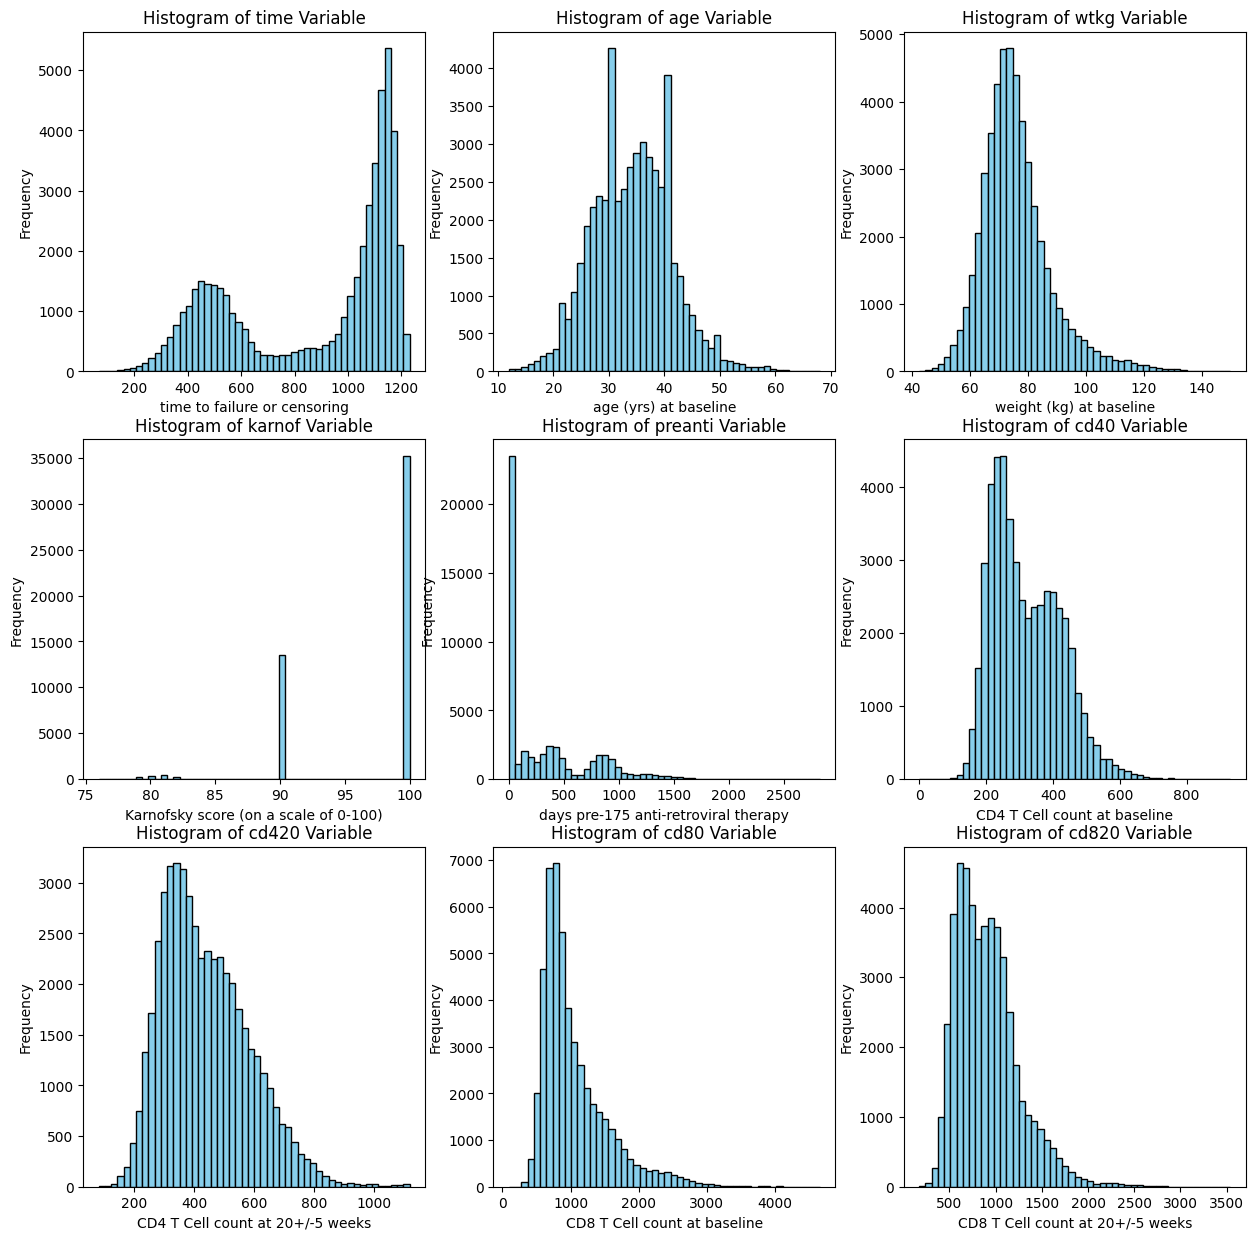

In [ ]:
# Creating figure with set of subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

#--------------------- first row -------------------------#

# histogram of time
axs[0,0].hist(df.time, bins=50, color='skyblue', edgecolor='black')
axs[0,0].set_xlabel('time to failure or censoring')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_title('Histogram of time Variable')

# histogram of age
axs[0,1].hist(df.age, bins=50, color='skyblue', edgecolor='black')
axs[0,1].set_xlabel('age (yrs) at baseline')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_title('Histogram of age Variable')

# histogram of wtkg
axs[0,2].hist(df.wtkg, bins=50, color='skyblue', edgecolor='black')
axs[0,2].set_xlabel('weight (kg) at baseline')
axs[0,2].set_ylabel('Frequency')
axs[0,2].set_title('Histogram of wtkg Variable')

#--------------------- second row -------------------------#

# histogram of karnof
axs[1,0].hist(df.karnof, bins=50, color='skyblue', edgecolor='black')
axs[1,0].set_xlabel('Karnofsky score (on a scale of 0-100)')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_title('Histogram of karnof Variable')

# histogram of preanti
axs[1,1].hist(df.preanti, bins=50, color='skyblue', edgecolor='black')
axs[1,1].set_xlabel('days pre-175 anti-retroviral therapy')
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_title('Histogram of preanti Variable')

# histogram of cd40
axs[1,2].hist(df.cd40, bins=50, color='skyblue', edgecolor='black')
axs[1,2].set_xlabel('CD4 T Cell count at baseline')
axs[1,2].set_ylabel('Frequency')
axs[1,2].set_title('Histogram of cd40 Variable')

#--------------------- third row -------------------------#

# histogram of cd420
axs[2,0].hist(df.cd420, bins=50, color='skyblue', edgecolor='black')
axs[2,0].set_xlabel('CD4 T Cell count at 20+/-5 weeks')
axs[2,0].set_ylabel('Frequency')
axs[2,0].set_title('Histogram of cd420 Variable')

# histogram of cd80
axs[2,1].hist(df.cd80, bins=50, color='skyblue', edgecolor='black')
axs[2,1].set_xlabel('CD8 T Cell count at baseline')
axs[2,1].set_ylabel('Frequency')
axs[2,1].set_title('Histogram of cd80 Variable')

# histogram of cd820
axs[2,2].hist(df.cd820, bins=50, color='skyblue', edgecolor='black')
axs[2,2].set_xlabel('CD8 T Cell count at 20+/-5 weeks')
axs[2,2].set_ylabel('Frequency')
axs[2,2].set_title('Histogram of cd820 Variable')

The variables that look at least close to a normal distribution are age, wtkg, cd40, cd420, cd80, and cd820.  The time variable looks like it could be two separate normal distributions (one for liver failure, one for time that they stopped reporting back) so we'll include that variable as well.

#### Model

Let's start with 2 clusters.

In [ ]:
# imports
import numpy as np
from sklearn.mixture import GaussianMixture

# reshape C in a way that sklearn likes it
C = np.vstack([df.time, df.wtkg, df.age, df.cd40, df.cd420, df.cd80, df.cd820])

# create an instance of the GaussianMixture class; set number of clusters to 2
gmm = GaussianMixture(n_components=2)

# fit the gmm model
gmm.fit(C)

# get the cluster labels
labels = gmm.predict(C)
labels

Using all variables crashes the notebook.  I'll try removing age and cd80, since those don't come up in any of the models.

In [ ]:
# imports
import numpy as np
from sklearn.mixture import GaussianMixture

# reshape C in a way that sklearn likes it
C = np.vstack([df.time, df.wtkg, df.cd40, df.cd420, df.cd820])

# create an instance of the GaussianMixture class; set number of clusters to 2
gmm = GaussianMixture(n_components=2)

# fit the gmm model
gmm.fit(C)

That errored out as well.  I'll try with just time, cd40, and cd420.

In [ ]:
# imports
import numpy as np
from sklearn.mixture import GaussianMixture

# reshape C in a way that sklearn likes it
C = np.vstack([df.time, df.cd40, df.cd420])

# create an instance of the GaussianMixture class; set number of clusters to 2
gmm = GaussianMixture(n_components=2)

# fit the gmm model
gmm.fit(C)

Even 3 didn't work.  I'll create the lda varialbe and just try with that.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Normalization
selected_columns = df[['time','age','wtkg','karnof','preanti','cd40','cd420','cd80','cd820']]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(selected_columns)
normalized_df = pd.DataFrame(normalized_data, columns=selected_columns.columns)

# LDA
lda = LDA(n_components=1) # Can only use 1 component, since only 2 classes
X_lda = lda.fit(normalized_df, df['infected']).transform(normalized_df)
df_lda = normalized_df.dot(lda.scalings_)
df['lda'] = df_lda
# df.head()

In [ ]:
# imports
import numpy as np
from sklearn.mixture import GaussianMixture

# reshape C in a way that sklearn likes it
C = df['lda'].values.reshape(-1, 1)

# create an instance of the GaussianMixture class; set number of clusters to 2
gmm = GaussianMixture(n_components=2)

# fit the gmm model
gmm.fit(C)

GaussianMixture(n_components=2)

In [ ]:
# get the cluster labels
labels = gmm.predict(C)
labels

array([0, 1, 1, ..., 0, 1, 1])

Try visualizing with a heat map

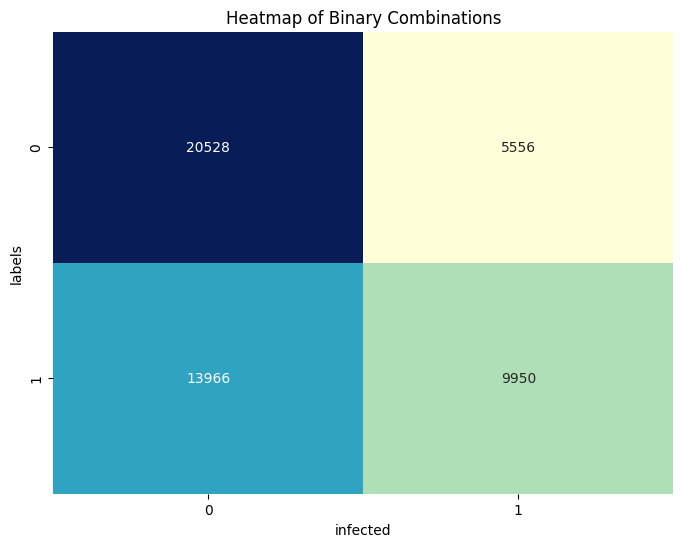

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each combination
df['labels'] = labels
counts = df.groupby(['labels', 'infected']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(counts, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title('Heatmap of Binary Combinations')
plt.xlabel('infected')
plt.ylabel('labels')
plt.show()

It looks like 1 matches with 1 pretty well and 0 with 0.  

#### Best n_components value

We will now try figuring out the best components value, similar to what we did in class.

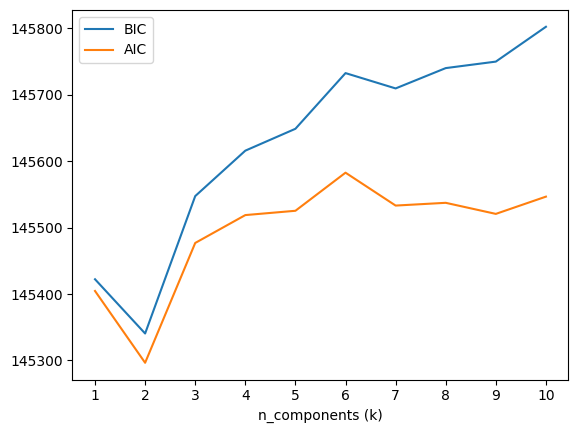

In [ ]:
# try for k=1,..., 10
n_components = np.arange(1, 11)

# create instance of the GaussianMixture class and fit the model
gmms = [GaussianMixture(n, covariance_type='full').fit(C)
        for n in n_components]

plt.plot(n_components, [m.bic(C) for m in gmms], label='BIC')
plt.plot(n_components, [m.aic(C) for m in gmms], label='AIC')

plt.legend(loc='best')
plt.xlabel('n_components (k)');
plt.xticks(np.arange(min(n_components), max(n_components)+1, 1.0));

It looks like two components is the best.  I'd still like to see what happens with more components.

In [ ]:
# create an instance of the GaussianMixture class; set number of clusters to 3
gmm = GaussianMixture(n_components=3)

# fit the gmm model
gmm.fit(C)

# get the cluster labels
df['labels3'] = gmm.predict(C)

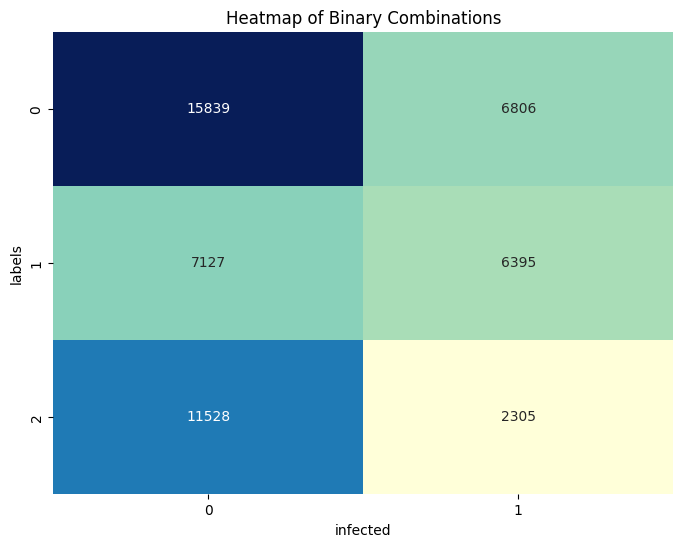

In [ ]:
# Count the occurrences of each combination
counts = df.groupby(['labels3', 'infected']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(counts, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title('Heatmap of Binary Combinations')
plt.xlabel('infected')
plt.ylabel('labels')
plt.show()

None of these groups have more infected than non-infected.  In the plot 9, was a local minimum.  So lets see what 9 clusters looks like.

In [ ]:
# create an instance of the GaussianMixture class; set number of clusters to 9
gmm = GaussianMixture(n_components=9)

# fit the gmm model
gmm.fit(C)

# get the cluster labels
df['labels9'] = gmm.predict(C)

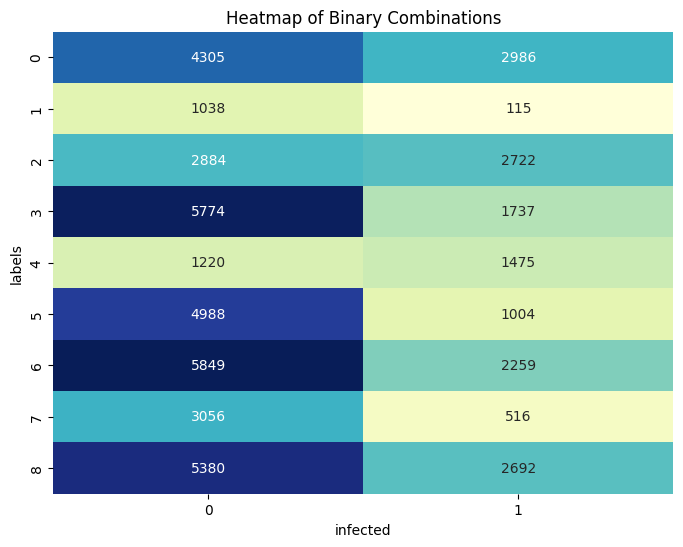

In [ ]:
# Count the occurrences of each combination
counts = df.groupby(['labels9', 'infected']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(counts, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title('Heatmap of Binary Combinations')
plt.xlabel('infected')
plt.ylabel('labels')
plt.show()

Cluster number 4 has more infected than non-infected (by a higher proportion than we found with the itemsets) and cluster number 2 has closed to a 0.5 proportion for infected = Yes.

## Backup

offtrt
(strat = 1, infected = 0: No)  
(strat = 1, infected = 1: Yes)  
(strat = 1, z30 = 0, infected = 0: No)  
(strat = 1, z30 = 0, infected = 1: Yes)  
(strat = 1, z30 = 0, trt = 0: ZDV only, infected = 0: No)  
(strat = 1, z30 = 0, trt = 0: ZDV only, offtrt = 0: No, infected = 0: No)  
(strat = 1, z30 = 0, trt = 0: ZDV only, offtrt = 1: Yes, infected = 0: No)  
(strat = 1, z30 = 0, trt = 1: ZDV + ddl, infected = 0: No)  
(strat = 1, z30 = 0, trt = 1: ZDV + ddl, offtrt = 0: No, infected = 0: No)  
(strat = 1, z30 = 0, trt = 2: ZDV + Zal, infected = 0: No)  
(strat = 1, z30 = 0, trt = 2: ZDV + Zal, offtrt = 0: No, infected = 0: No)  
(strat = 1, z30 = 0, trt = 3: ddl only, infected = 0: No)  
(strat = 1, z30 = 0, trt = 3: ddl only, offtrt = 0: No, infected = 0: No)  
(strat = 1, z30 = 0, trt = 3: ddl only, offtrt = 1: Yes, infected = 0: No)  
(strat = 1, z30 = 1, infected = 0: No)  
(strat = 1, z30 = 1, infected = 1: Yes)  
(strat = 1, z30 = 1, trt = 0: ZDV only, infected = 0: No)  
(strat = 1, z30 = 1, trt = 0: ZDV only, offtrt = 0: No, infected = 0: No)  
(strat = 1, z30 = 1, trt = 2: ZDV + Zal, infected = 0: No)  
(strat = 1, z30 = 1, trt = 3: ddl only, infected = 0: No)  
(strat = 2, infected = 0: No)  
(strat = 2, infected = 1: Yes)  
(strat = 2, z30 = 0, infected = 0: No)  
(strat = 2, z30 = 0, infected = 1: Yes)  
(strat = 2, z30 = 1, infected = 0: No)  
(strat = 2, z30 = 1, infected = 1: Yes)  
(strat = 2, z30 = 1, trt = 0: ZDV only, infected = 0: No)  
(strat = 2, z30 = 1, trt = 0: ZDV only, offtrt = 0: No, infected = 0: No)  
(strat = 2, z30 = 1, trt = 0: ZDV only, infected = 1: Yes)  
(strat = 2, z30 = 1, trt = 2: ZDV + Zal, infected = 0: No)  
(strat = 2, z30 = 1, trt = 3: ddl only, infected = 0: No)  
(strat = 3, infected = 0: No)  
(strat = 3, infected = 1: Yes)  
(strat = 3, z30 = 0, infected = 0: No)  
(strat = 3, z30 = 0, infected = 1: Yes)  
(strat = 3, z30 = 1, infected = 0: No)  
(strat = 3, z30 = 1, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 0: ZDV only, infected = 0: No)  
(strat = 3, z30 = 1, trt = 0: ZDV only, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 0: ZDV only, offtrt = 0: No, infected = 0: No)  
(strat = 3, z30 = 1, trt = 0: ZDV only, offtrt = 0: No, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 0: ZDV only, offtrt = 1: Yes, infected = 0: No)  
(strat = 3, z30 = 1, trt = 1: ZDV + ddl, infected = 0: No)  
(strat = 3, z30 = 1, trt = 2: ZDV + Zal, infected = 0: No)  
(strat = 3, z30 = 1, trt = 2: ZDV + Zal, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 2: ZDV + Zal, offtrt = 0: No, infected = 0: No)  
(strat = 3, z30 = 1, trt = 2: ZDV + Zal, offtrt = 0: No, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 3: ddl only, infected = 0: No)  
(strat = 3, z30 = 1, trt = 3: ddl only, infected = 1: Yes)  
(strat = 3, z30 = 1, trt = 3: ddl only, offtrt = 0: No, infected = 0: No)  
(strat = 3, z30 = 1, trt = 3: ddl only, offtrt = 0: No, infected = 1: Yes)  

race
(1, infected = 0: No)  
(1, infected = 1: Yes)  
(1, z30 = 0, infected = 0: No)  
(1, z30 = 0, infected = 1: Yes)  
(1, z30 = 0, trt = 0, infected = 0: No)  
(1, z30 = 0, trt = 0, offtrt = 0, infected = 0: No)  
(1, z30 = 0, trt = 0, offtrt = 0, race = 0: white, infected = 0: No)  
(1, z30 = 0, trt = 0, offtrt = 0, race = 1: non-white, infected = 0: No)  
(1, z30 = 0, trt = 0, offtrt = 1, infected = 0: No)  
(1, z30 = 0, trt = 1, infected = 0: No)  
(1, z30 = 0, trt = 1, offtrt = 0, infected = 0: No)  
(1, z30 = 0, trt = 2, infected = 0: No)  
(1, z30 = 0, trt = 2, offtrt = 0, infected = 0: No)  
(1, z30 = 0, trt = 2, offtrt = 0, race = 0: white, infected = 0: No)  
(1, z30 = 0, trt = 3, infected = 0: No)  
(1, z30 = 0, trt = 3, offtrt = 0, infected = 0: No)  
(1, z30 = 0, trt = 3, offtrt = 0, race = 0: white, infected = 0: No)  
(1, z30 = 0, trt = 3, offtrt = 1, infected = 0: No)  
(1, z30 = 1, infected = 0: No)  
(1, z30 = 1, infected = 1: Yes)  
(1, z30 = 1, trt = 0, infected = 0: No)  
(1, z30 = 1, trt = 0, offtrt = 0, infected = 0: No)  
(1, z30 = 1, trt = 2, infected = 0: No)  
(1, z30 = 1, trt = 3, infected = 0: No)  
(2, infected = 0: No)  
(2, infected = 1: Yes)  
(2, z30 = 0, infected = 0: No)  
(2, z30 = 0, infected = 1: Yes)  
(2, z30 = 1, infected = 0: No)  
(2, z30 = 1, infected = 1: Yes)  
(2, z30 = 1, trt = 0, infected = 0: No)  
(2, z30 = 1, trt = 0, infected = 1: Yes)  
(2, z30 = 1, trt = 0, offtrt = 0, infected = 0: No)  
(2, z30 = 1, trt = 2, infected = 0: No)  
(2, z30 = 1, trt = 3, infected = 0: No)  
(3, infected = 0: No)  
(3, infected = 1: Yes)  
(3, z30 = 0, infected = 0: No)  
(3, z30 = 0, infected = 1: Yes)  
(3, z30 = 1, infected = 0: No)  
(3, z30 = 1, infected = 1: Yes)  
(3, z30 = 1, trt = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0: white, infected = 0: No)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0: white, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 1, infected = 0: No)  
(3, z30 = 1, trt = 1, infected = 0: No)  
(3, z30 = 1, trt = 2, infected = 0: No)  
(3, z30 = 1, trt = 2, infected = 1: Yes)  
(3, z30 = 1, trt = 2, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 2, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 2, offtrt = 0, race = 0: white, infected = 0: No)  
(3, z30 = 1, trt = 3, infected = 0: No)  
(3, z30 = 1, trt = 3, infected = 1: Yes)  
(3, z30 = 1, trt = 3, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 3, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0: white, infected = 0: No)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0: white, infected = 1: Yes)  

race
(1, infected = 0: No)  
(1, infected = 1: Yes)  
(1, z30 = 0, infected = 0: No)  
(1, z30 = 0, infected = 1: Yes)  
(1, z30 = 0, trt = 0, infected = 0: No)  
(1, z30 = 0, trt = 0, offtrt = 0, infected = 0: No)  
(1, z30 = 0, trt = 0, offtrt = 0, race = 0, infected = 0: No)  
(1, z30 = 0, trt = 0, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(1, z30 = 0, trt = 0, offtrt = 0, race = 1, infected = 0: No)  
(1, z30 = 0, trt = 0, offtrt = 1, infected = 0: No)  
(1, z30 = 0, trt = 1, infected = 0: No)  
(1, z30 = 0, trt = 1, offtrt = 0, infected = 0: No)  
(1, z30 = 0, trt = 2, infected = 0: No)  
(1, z30 = 0, trt = 2, offtrt = 0, infected = 0: No)  
(1, z30 = 0, trt = 2, offtrt = 0, race = 0, infected = 0: No)  
(1, z30 = 0, trt = 2, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(1, z30 = 0, trt = 3, infected = 0: No)  
(1, z30 = 0, trt = 3, offtrt = 0, infected = 0: No)  
(1, z30 = 0, trt = 3, offtrt = 0, race = 0, infected = 0: No)  
(1, z30 = 0, trt = 3, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(1, z30 = 0, trt = 3, offtrt = 1, infected = 0: No)  
(1, z30 = 1, infected = 0: No)  
(1, z30 = 1, infected = 1: Yes)  
(1, z30 = 1, trt = 0, infected = 0: No)  
(1, z30 = 1, trt = 0, offtrt = 0, infected = 0: No)  
(1, z30 = 1, trt = 2, infected = 0: No)  
(1, z30 = 1, trt = 3, infected = 0: No)  
(2, infected = 0: No)  
(2, infected = 1: Yes)  
(2, z30 = 0, infected = 0: No)  
(2, z30 = 0, infected = 1: Yes)  
(2, z30 = 1, infected = 0: No)  
(2, z30 = 1, infected = 1: Yes)  
(2, z30 = 1, trt = 0, infected = 0: No)  
(2, z30 = 1, trt = 0, infected = 1: Yes)  
(2, z30 = 1, trt = 0, offtrt = 0, infected = 0: No)  
(2, z30 = 1, trt = 2, infected = 0: No)  
(2, z30 = 1, trt = 3, infected = 0: No)  
(3, infected = 0: No)  
(3, infected = 1: Yes)  
(3, z30 = 0, infected = 0: No)  
(3, z30 = 0, infected = 1: Yes)  
(3, z30 = 1, infected = 0: No)  
(3, z30 = 1, infected = 1: Yes)  
(3, z30 = 1, trt = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, z30 = 1, trt = 0, offtrt = 0, race = 0, drugs = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 0, offtrt = 1, infected = 0: No)  
(3, z30 = 1, trt = 1, infected = 0: No)  
(3, z30 = 1, trt = 2, infected = 0: No)  
(3, z30 = 1, trt = 2, infected = 1: Yes)  
(3, z30 = 1, trt = 2, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 2, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 2, offtrt = 0, race = 0, infected = 0: No)  
(3, z30 = 1, trt = 2, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, z30 = 1, trt = 3, infected = 0: No)  
(3, z30 = 1, trt = 3, infected = 1: Yes)  
(3, z30 = 1, trt = 3, offtrt = 0, infected = 0: No)  
(3, z30 = 1, trt = 3, offtrt = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0, infected = 0: No)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0, infected = 1: Yes)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, z30 = 1, trt = 3, offtrt = 0, race = 0, drugs = 0, infected = 1: Yes)  

oprior
(1, infected = 0: No)  
(1, infected = 1: Yes)  
(1, 0, infected = 0: No)  
(1, 0, infected = 1: Yes)  
(1, 0, 0, infected = 0: No)  
(1, 0, 0, offtrt = 0, infected = 0: No)  
(1, 0, 0, offtrt = 0, race = 0, infected = 0: No)  
(1, 0, 0, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(1, 0, 0, offtrt = 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(1, 0, 0, offtrt = 0, race = 1, infected = 0: No)  
(1, 0, 0, offtrt = 1, infected = 0: No)  
(1, 0, 1, infected = 0: No)  
(1, 0, 1, offtrt = 0, infected = 0: No)  
(1, 0, 2, infected = 0: No)  
(1, 0, 2, offtrt = 0, infected = 0: No)  
(1, 0, 2, offtrt = 0, race = 0, infected = 0: No)  
(1, 0, 2, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(1, 0, 3, infected = 0: No)  
(1, 0, 3, offtrt = 0, infected = 0: No)  
(1, 0, 3, offtrt = 0, race = 0, infected = 0: No)  
(1, 0, 3, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(1, 0, 3, offtrt = 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(1, 0, 3, offtrt = 1, infected = 0: No)  
(1, 1, infected = 0: No)  
(1, 1, infected = 1: Yes)  
(1, 1, 0, infected = 0: No)  
(1, 1, 0, offtrt = 0, infected = 0: No)  
(1, 1, 2, infected = 0: No)  
(1, 1, 3, infected = 0: No)  
(2, infected = 0: No)  
(2, infected = 1: Yes)  
(2, 0, infected = 0: No)  
(2, 0, infected = 1: Yes)  
(2, 1, infected = 0: No)  
(2, 1, infected = 1: Yes)  
(2, 1, 0, infected = 0: No)  
(2, 1, 0, infected = 1: Yes)  
(2, 1, 0, offtrt = 0, infected = 0: No)  
(2, 1, 2, infected = 0: No)  
(2, 1, 3, infected = 0: No)  
(3, infected = 0: No)  
(3, infected = 1: Yes)  
(3, 0, infected = 0: No)  
(3, 0, infected = 1: Yes)  
(3, 1, infected = 0: No)  
(3, 1, infected = 1: Yes)  
(3, 1, 0, infected = 0: No)  
(3, 1, 0, infected = 1: Yes)  
(3, 1, 0, offtrt = 0, infected = 0: No)  
(3, 1, 0, offtrt = 0, infected = 1: Yes)  
(3, 1, 0, offtrt = 0, race = 0, infected = 0: No)  
(3, 1, 0, offtrt = 0, race = 0, infected = 1: Yes)  
(3, 1, 0, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, 1, 0, offtrt = 0, race = 0, drugs = 0, infected = 1: Yes)  
(3, 1, 0, offtrt = 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(3, 1, 0, offtrt = 0, race = 0, drugs = 0, oprior = 0, infected = 1: Yes)  
(3, 1, 0, offtrt = 1, infected = 0: No)  
(3, 1, 1, infected = 0: No)  
(3, 1, 2, infected = 0: No)  
(3, 1, 2, infected = 1: Yes)  
(3, 1, 2, offtrt = 0, infected = 0: No)  
(3, 1, 2, offtrt = 0, infected = 1: Yes)  
(3, 1, 2, offtrt = 0, race = 0, infected = 0: No)  
(3, 1, 2, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, 1, 2, offtrt = 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(3, 1, 3, infected = 0: No)  
(3, 1, 3, infected = 1: Yes)  
(3, 1, 3, offtrt = 0, infected = 0: No)  
(3, 1, 3, offtrt = 0, infected = 1: Yes)  
(3, 1, 3, offtrt = 0, race = 0, infected = 0: No)  
(3, 1, 3, offtrt = 0, race = 0, infected = 1: Yes)  
(3, 1, 3, offtrt = 0, race = 0, drugs = 0, infected = 0: No)  
(3, 1, 3, offtrt = 0, race = 0, drugs = 0, infected = 1: Yes)  
(3, 1, 3, offtrt = 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  


homo
(1, infected = 0: No)  
(1, infected = 1: Yes)  
(1, 0, infected = 0: No)  
(1, 0, infected = 1: Yes)  
(1, 0, 0, infected = 0: No)  
(1, 0, 0, 0, infected = 0: No)  
(1, 0, 0, 0, race = 0, infected = 0: No)  
(1, 0, 0, 0, race = 0, drugs = 0, infected = 0: No)  
(1, 0, 0, 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(1, 0, 0, 0, race = 0, drugs = 0, oprior = 0, homo = 1, infected = 0: No)  
(1, 0, 0, 0, race = 1, infected = 0: No)  
(1, 0, 0, 1, infected = 0: No)  
(1, 0, 1, infected = 0: No)  
(1, 0, 1, 0, infected = 0: No)  
(1, 0, 2, infected = 0: No)  
(1, 0, 2, 0, infected = 0: No)  
(1, 0, 2, 0, race = 0, infected = 0: No)  
(1, 0, 2, 0, race = 0, drugs = 0, infected = 0: No)  
(1, 0, 3, infected = 0: No)  
(1, 0, 3, 0, infected = 0: No)  
(1, 0, 3, 0, race = 0, infected = 0: No)  
(1, 0, 3, 0, race = 0, drugs = 0, infected = 0: No)  
(1, 0, 3, 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(1, 0, 3, 0, race = 0, drugs = 0, oprior = 0, homo = 1, infected = 0: No)  
(1, 0, 3, 1, infected = 0: No)  
(1, 1, infected = 0: No)  
(1, 1, infected = 1: Yes)  
(1, 1, 0, infected = 0: No)  
(1, 1, 0, 0, infected = 0: No)  
(1, 1, 2, infected = 0: No)  
(1, 1, 3, infected = 0: No)  
(2, infected = 0: No)  
(2, infected = 1: Yes)  
(2, 0, infected = 0: No)  
(2, 0, infected = 1: Yes)  
(2, 1, infected = 0: No)  
(2, 1, infected = 1: Yes)  
(2, 1, 0, infected = 0: No)  
(2, 1, 0, infected = 1: Yes)  
(2, 1, 0, 0, infected = 0: No)  
(2, 1, 2, infected = 0: No)  
(2, 1, 3, infected = 0: No)  
(3, infected = 0: No)  
(3, infected = 1: Yes)  
(3, 0, infected = 0: No)  
(3, 0, infected = 1: Yes)  
(3, 1, infected = 0: No)  
(3, 1, infected = 1: Yes)  
(3, 1, 0, infected = 0: No)  
(3, 1, 0, infected = 1: Yes)  
(3, 1, 0, 0, infected = 0: No)  
(3, 1, 0, 0, infected = 1: Yes)  
(3, 1, 0, 0, race = 0, infected = 0: No)  
(3, 1, 0, 0, race = 0, infected = 1: Yes)  
(3, 1, 0, 0, race = 0, drugs = 0, infected = 0: No)  
(3, 1, 0, 0, race = 0, drugs = 0, infected = 1: Yes)  
(3, 1, 0, 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(3, 1, 0, 0, race = 0, drugs = 0, oprior = 0, infected = 1: Yes)  
(3, 1, 0, 0, race = 0, drugs = 0, oprior = 0, homo = 1, infected = 1: Yes)  
(3, 1, 0, 1, infected = 0: No)  
(3, 1, 1, infected = 0: No)  
(3, 1, 2, infected = 0: No)  
(3, 1, 2, infected = 1: Yes)  
(3, 1, 2, 0, infected = 0: No)  
(3, 1, 2, 0, infected = 1: Yes)  
(3, 1, 2, 0, race = 0, infected = 0: No)  
(3, 1, 2, 0, race = 0, drugs = 0, infected = 0: No)  
(3, 1, 2, 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  
(3, 1, 3, infected = 0: No)  
(3, 1, 3, infected = 1: Yes)  
(3, 1, 3, 0, infected = 0: No)  
(3, 1, 3, 0, infected = 1: Yes)  
(3, 1, 3, 0, race = 0, infected = 0: No)  
(3, 1, 3, 0, race = 0, infected = 1: Yes)  
(3, 1, 3, 0, race = 0, drugs = 0, infected = 0: No)  
(3, 1, 3, 0, race = 0, drugs = 0, infected = 1: Yes)  
(3, 1, 3, 0, race = 0, drugs = 0, oprior = 0, infected = 0: No)  


symptom
(1, infected = 0: No)  
(1, infected = 1: Yes)  
(1, 0, infected = 0: No)  
(1, 0, infected = 1: Yes)  
(1, 0, 0, infected = 0: No)  
(1, 0, 0, 0, infected = 0: No)  
(1, 0, 0, 0, 0, infected = 0: No)  
(1, 0, 0, 0, 0, 0, infected = 0: No)  
(1, 0, 0, 0, 0, 0, oprior = 0, infected = 0: No)  
(1, 0, 0, 0, 0, 0, oprior = 0, homo = 1, infected = 0: No)  
(1, 0, 0, 0, 0, 0, oprior = 0, homo = 1, symptom = 0: asymp, infected = 0: No)  
(1, 0, 0, 0, 1, infected = 0: No)  
(1, 0, 0, 1, infected = 0: No)  
(1, 0, 1, infected = 0: No)  
(1, 0, 1, 0, infected = 0: No)  
(1, 0, 2, infected = 0: No)  
(1, 0, 2, 0, infected = 0: No)  
(1, 0, 2, 0, 0, infected = 0: No)  
(1, 0, 2, 0, 0, 0, infected = 0: No)  
(1, 0, 3, infected = 0: No)  
(1, 0, 3, 0, infected = 0: No)  
(1, 0, 3, 0, 0, infected = 0: No)  
(1, 0, 3, 0, 0, 0, infected = 0: No)  
(1, 0, 3, 0, 0, 0, oprior = 0, infected = 0: No)  
(1, 0, 3, 0, 0, 0, oprior = 0, homo = 1, infected = 0: No)  
(1, 0, 3, 0, 0, 0, oprior = 0, homo = 1, symptom = 0: asymp, infected = 0: No)  
(1, 0, 3, 1, infected = 0: No)  
(1, 1, infected = 0: No)  
(1, 1, infected = 1: Yes)  
(1, 1, 0, infected = 0: No)  
(1, 1, 0, 0, infected = 0: No)  
(1, 1, 2, infected = 0: No)  
(1, 1, 3, infected = 0: No)  
(2, infected = 0: No)  
(2, infected = 1: Yes)  
(2, 0, infected = 0: No)  
(2, 0, infected = 1: Yes)  
(2, 1, infected = 0: No)  
(2, 1, infected = 1: Yes)  
(2, 1, 0, infected = 0: No)  
(2, 1, 0, infected = 1: Yes)  
(2, 1, 0, 0, infected = 0: No)  
(2, 1, 2, infected = 0: No)  
(2, 1, 3, infected = 0: No)  
(3, infected = 0: No)  
(3, infected = 1: Yes)  
(3, 0, infected = 0: No)  
(3, 0, infected = 1: Yes)  
(3, 1, infected = 0: No)  
(3, 1, infected = 1: Yes)  
(3, 1, 0, infected = 0: No)  
(3, 1, 0, infected = 1: Yes)  
(3, 1, 0, 0, infected = 0: No)  
(3, 1, 0, 0, infected = 1: Yes)  
(3, 1, 0, 0, 0, infected = 0: No)  
(3, 1, 0, 0, 0, infected = 1: Yes)  
(3, 1, 0, 0, 0, 0, infected = 0: No)  
(3, 1, 0, 0, 0, 0, infected = 1: Yes)  
(3, 1, 0, 0, 0, 0, oprior = 0, infected = 0: No)  
(3, 1, 0, 0, 0, 0, oprior = 0, infected = 1: Yes)  
(3, 1, 0, 0, 0, 0, oprior = 0, homo = 1, infected = 1: Yes)  
(3, 1, 0, 1, infected = 0: No)  
(3, 1, 1, infected = 0: No)  
(3, 1, 2, infected = 0: No)  
(3, 1, 2, infected = 1: Yes)  
(3, 1, 2, 0, infected = 0: No)  
(3, 1, 2, 0, infected = 1: Yes)   
(3, 1, 2, 0, 0, infected = 0: No)
(3, 1, 2, 0, 0, 0, infected = 0: No)  
(3, 1, 2, 0, 0, 0, oprior = 0, infected = 0: No)  
(3, 1, 3, infected = 0: No)  
(3, 1, 3, infected = 1: Yes)  
(3, 1, 3, 0, infected = 0: No)  
(3, 1, 3, 0, infected = 1: Yes)  
(3, 1, 3, 0, 0, infected = 0: No)  
(3, 1, 3, 0, 0, infected = 1: Yes)  
(3, 1, 3, 0, 0, 0, infected = 0: No)  
(3, 1, 3, 0, 0, 0, infected = 1: Yes)  
(3, 1, 3, 0, 0, 0, oprior = 0, infected = 0: No)  